<a href="https://colab.research.google.com/github/Kobzarko/python_for_DA_tasks/blob/main/Creative_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data_path ='/content/drive/MyDrive/Colab Notebooks/Data/yulu_rental.csv'

df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Посилання на файл [yulu_rental.csv](https://drive.google.com/file/d/1abUBbpxK6GOoUgA5f40L7EA9ROEiTuf0/view?usp=sharing)

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


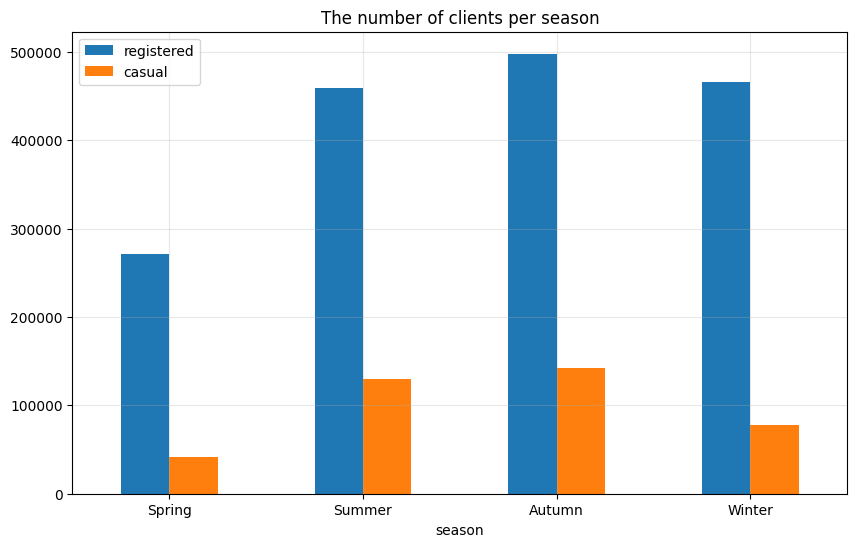

In [4]:
df_season = df[['season', 'registered', 'casual']].groupby('season').sum()

season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn',
    4: 'Winter'
}

df_season = df_season.rename(index=season_map)

df_season.head()
df_season.plot.bar(figsize=(10,6), rot=0);
plt.title('The number of clients per season')
plt.grid(axis='both', alpha=.3)


Кількість неформальних та зареєстрованих користувачів по сезонам.

Дає можливість визначити різницю у застованих велосипедах по сезонно для проведення профілактичних робіт, продажу застарілих екземплярів та оновлення нашого велосипедного парку.

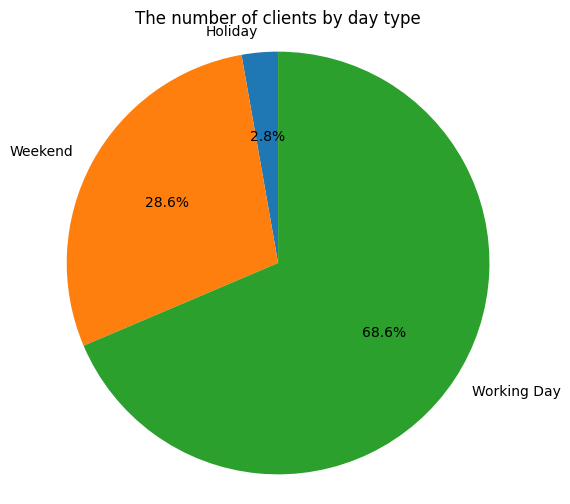

In [6]:
def day_type(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Working Day'
    else:
        return 'Weekend'

df['day_type'] = df.apply(day_type, axis=1)

# Вибираємо відповідні колонки
df_filtered = df[['count', 'day_type']].groupby('day_type').sum()

# Створюємо парні графіки розсіювання з новою змінною
plt.figure(figsize=(6,6))
plt.pie(df_filtered['count'], labels=df_filtered.index, autopct='%1.1f%%', startangle=90)
plt.title('The number of clients by day type')
plt.axis('equal')
plt.show()

Визначити кількість користувачів за типом дня.

Дасть можливість зрозуміти чи потрібно виходити працівникам у святкові дні.
Покращити умови для нашого персоналу.

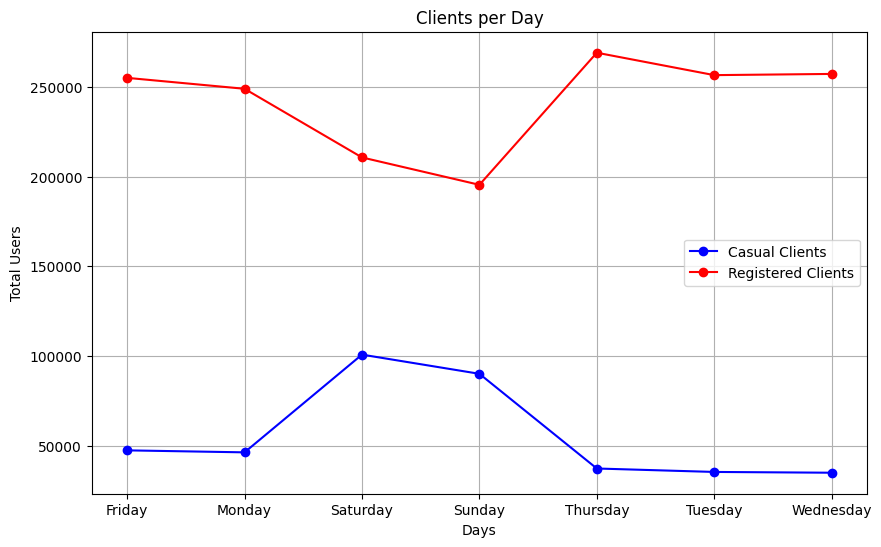

In [9]:

# Додаємо колонку 'day' з назвою дня
df['datetime'] = pd.to_datetime(df.datetime)
df['day'] = df['datetime'].dt.day_name()


# Групуємо дані за днем
df_min_day = df.groupby('day')[['casual','registered']].sum()

# Створюємо лінійний графік
plt.figure(figsize=(10,6))
plt.plot(df_min_day.index, df_min_day['casual'], label='Casual Clients', color='b', marker='o')
plt.plot(df_min_day.index, df_min_day['registered'], label='Registered Clients', color='r', marker='o')

# Додаємо підписи до осей і заголовок
plt.xlabel('Days')
plt.ylabel('Total Users')
plt.title('Clients per Day')

# Додаємо легенду
plt.legend()

# Виводимо графік
plt.grid(True)
plt.show()



Середа - день з найменьшою кількістю замовлень нашого сервісу незареєстрованими користувачами. Акції та знижки на цей день можуть посприяти підвищенню попиту зі сторони незареєстрованих користувачів.